<a href="https://colab.research.google.com/github/SandeepanMahapatra/FDI-Analysis/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing necessary modules and reading in the dataset

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
file1 = 'D:\\Studies\\Project\\Resources\\FDI_in_India.csv'
file2 = 'D:\\Studies\\Project\\Resources\\dipp.csv'


dataframe = pd.read_csv(file1, index_col=0)
dataframe.dropna(thresh = 2, inplace=True)
# dataframe.isnull().sum()

In [0]:
dataframe.head()

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
Sector,,,,,,,,,,,,,,,,,
METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [0]:
dataframe2 = pd.read_csv(file2,index_col=0)
dataframe2.head()

,AMOUNT_IN_RS,AMOUNT_IN_USD,UNIT,FROM_DATE,TO_DATE
SECTOR_NAME,,,,,
METALLURGICAL INDUSTRIES,601207.09,11372.21,MILLION,01/04/2000,30/06/2019
MINING,150461.67,2651.22,MILLION,01/04/2000,30/06/2019
POWER,792091.15,14505.55,MILLION,01/04/2000,30/06/2019
NON-CONVENTIONAL ENERGY,489595.36,8063.07,MILLION,01/04/2000,30/06/2019
COAL PRODUCTION,1191.89,27.73,MILLION,01/04/2000,30/06/2019


## Preprocessing the dataframes and joining

In [0]:
data_sum = dataframe.copy()
data_sum['Sum_upto_16-17'] = dataframe.sum(axis=1)
dataframe2 = dataframe2[['AMOUNT_IN_USD']]
data_join = data_sum.join(dataframe2,how='outer')
data_join

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,Sum_upto_16-17,AMOUNT_IN_USD
AGRICULTURAL MACHINERY,3.64,1.04,13.48,47.54,0.00,92.71,25.19,6.72,5.57,1.88,0.49,2.77,95.41,48.78,72.35,16.44,15.19,449.20,540.07
AGRICULTURE SERVICES,17.52,14.06,11.01,0.59,3.83,9.08,12.53,58.13,5.35,1222.22,43.90,49.02,161.47,91.01,59.95,84.65,76.43,1920.75,2127.83
AIR TRANSPORT (INCLUDING AIR FREIGHT),0.00,0.00,3.80,0.94,4.11,10.27,62.29,99.08,61.37,23.71,136.60,31.22,15.89,45.95,74.56,361.25,83.40,1014.44,1904.37
AUTOMOBILE INDUSTRY,195.33,235.76,419.96,119.09,121.97,139.93,260.72,656.10,1150.03,1236.29,1299.41,922.99,1537.28,1517.28,2725.64,2526.82,1609.32,16673.92,22358.84
BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.04,0.54,0.00,3.31,1.51,0.00,3.96,0.63,31.79,20.05,0.17,1.33,77.91,53.91,195.15,263.37
CEMENT AND GYPSUM PRODUCTS,67.72,139.90,21.08,9.58,0.16,452.08,242.47,16.89,724.80,33.80,637.68,267.90,12.38,254.01,208.99,19.69,2130.10,5239.23,5277.26
CERAMICS,4.03,0.78,0.21,1.47,26.79,5.67,122.23,115.11,198.43,7.21,12.00,9.87,4.33,150.09,35.29,51.21,15.40,760.12,868.46
CHEMICALS (OTHER THAN FERTILIZERS),111.14,87.23,128.12,20.24,69.39,387.72,138.85,233.70,651.22,365.94,2354.40,4040.71,292.16,786.76,762.76,1469.95,1392.80,13293.09,16726.96
COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00,27.74,27.73
COIR,0.00,0.00,0.00,0.00,0.47,0.59,0.04,0.01,0.00,0.25,0.10,0.55,0.15,0.54,1.36,0.00,0.00,4.06,4.07


### The first dataframe has data upto 2017 and the second has data upto 2019. So we use these two dataframes to get data from 2017-19 by subtracting 'Sum_upto_16-17' from 'AMOUNT_IN_USD'. Assuming a third od that investment came in the financial year 2017-18 and the rest two third in the financial year 2018-19

In [0]:
dataframe['2017-18'] = (2/3)*(data_join['AMOUNT_IN_USD'] - data_join['Sum_upto_16-17'])
dataframe['2018-19'] = (data_join['AMOUNT_IN_USD'] - data_join['Sum_upto_16-17'])/(3)
dataframe.fillna(0,inplace=True)
dataframe

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Sector,,,,,,,,,,,,,,,,,,,
METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18,694.446667,347.223333
MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75,252.926667,126.463333
POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98,1944.280000,972.140000
NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57,1921.053333,960.526667
COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00,-0.006667,-0.003333
PETROLEUM & NATURAL GAS,9.35,211.07,56.78,80.64,102.78,12.09,87.71,1405.04,349.29,265.53,556.43,2029.98,214.80,112.23,1079.02,103.02,180.40,110.653333,55.326667
BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.04,0.54,0.00,3.31,1.51,0.00,3.96,0.63,31.79,20.05,0.17,1.33,77.91,53.91,45.480000,22.740000
PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,2.66,0.74,25.57,40.53,74.88,39.50,166.44,313.75,184.60,212.78,230.70,159.13,286.88,276.453333,138.226667
ELECTRICAL EQUIPMENTS,79.76,65.76,34.71,73.20,97.40,39.50,76.85,653.74,417.35,728.27,153.90,566.39,195.87,134.31,574.83,444.88,2230.69,1075.433333,537.716667


## Transforming the dataset

In [0]:
df = dataframe.transpose()
df.index = [x[1] for x in df.index.str.split('-')]
new = str('20') + df.index
new

Index(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [0]:
df = dataframe.transpose()
df.index = [x[1] for x in df.index.str.split('-')]
df.index = str('20') + df.index
df.index = pd.to_datetime(df.index)
print(type(df.index))
df.tail()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Sector,METALLURGICAL INDUSTRIES,MINING,POWER,NON-CONVENTIONAL ENERGY,COAL PRODUCTION,PETROLEUM & NATURAL GAS,BOILERS AND STEAM GENERATING PLANTS,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),ELECTRICAL EQUIPMENTS,COMPUTER SOFTWARE & HARDWARE,...,TRADING,RETAIL TRADING,AGRICULTURE SERVICES,"DIAMOND,GOLD ORNAMENTS",TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER),PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY),COIR,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,"CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects",MISCELLANEOUS INDUSTRIES
2015-01-01,359.340000,684.390000,707.04,615.950000,0.000000,1079.020000,1.33,230.700000,574.830000,2296.04,...,2727.960000,168.72,59.950000,280.180000,1.430000,72.580000,1.360000,870.250000,769.140000,765.880000
2016-01-01,456.310000,520.670000,868.80,776.510000,0.000000,103.020000,77.91,159.130000,444.880000,5904.36,...,3845.320000,262.24,84.650000,58.540000,1.120000,122.810000,0.000000,4510.710000,112.550000,668.770000
2017-01-01,1440.180000,55.750000,1112.98,783.570000,0.000000,180.400000,53.91,286.880000,2230.690000,3651.71,...,2338.400000,450.94,76.430000,123.920000,1.600000,53.170000,0.000000,1860.730000,105.140000,296.400000
2018-01-01,694.446667,252.926667,1944.28,1921.053333,-0.006667,110.653333,45.48,276.453333,1075.433333,9872.94,...,6632.433333,0.00,138.053333,175.986667,22.993333,593.506667,0.006667,3679.813333,552.806667,860.646667
2019-01-01,347.223333,126.463333,972.14,960.526667,-0.003333,55.326667,22.74,138.226667,537.716667,4936.47,...,3316.216667,0.00,69.026667,87.993333,11.496667,296.753333,0.003333,1839.906667,276.403333,430.323333


# FDI in various sectors of Indian economy since 2000

c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


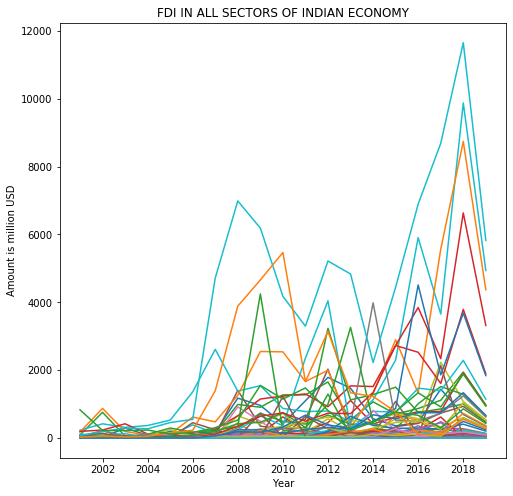

In [0]:
def plot_data(data=df,x='Year',y='Amount is million USD',t='FDI IN ALL SECTORS OF INDIAN ECONOMY'):
    plt.figure(figsize=(8,8))
    plt.plot(data)
#     plt.legend(data.columns)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()
    
plot_data()

#### This is a very untidy interpretation of the data. Let us take the top 10 sectors which are most invested in since 2000.


# Analysing the current top 5 sectors which are the most invested in.

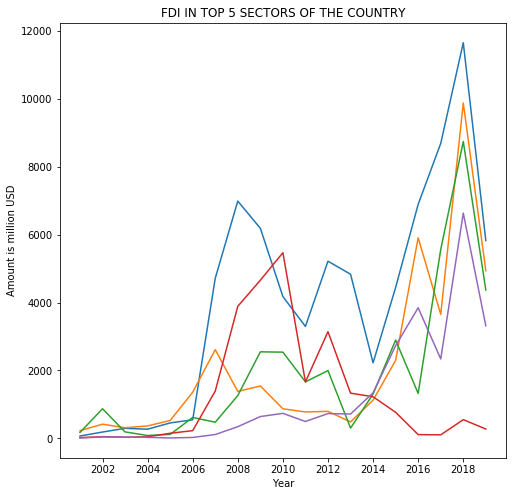

In [0]:
def avg_sector(df=dataframe,number=5):
    data = df.copy(deep=True)
    data['avg'] = pd.Series()
    for sector in data.index:
        data['avg'] = data.mean(axis=1)
        top_df = data.sort_values(by='avg',ascending=False,inplace=False)
    top = top_df.head(number).index
    top_df.drop(columns=['avg'],axis=1,inplace=True)
    return top

 
avg_sector(dataframe)

top_sectors = avg_sector()
df_top = df[top_sectors]
plot_data(data=df_top, x= 'Year', y= 'Amount is million USD',t= 'FDI IN TOP 5 SECTORS OF THE COUNTRY')

### These are the top 5 sectors which have received the most foreign investments in the past 19 years. It can be seen that most of these sectors have an 100%+ increment in investments. Few have remained stagnant while some industries like Construction Development has gone down.

# Does government have anything to do with FDIs?

## Analysing how FDIs have changed pre and post Modi government

[]

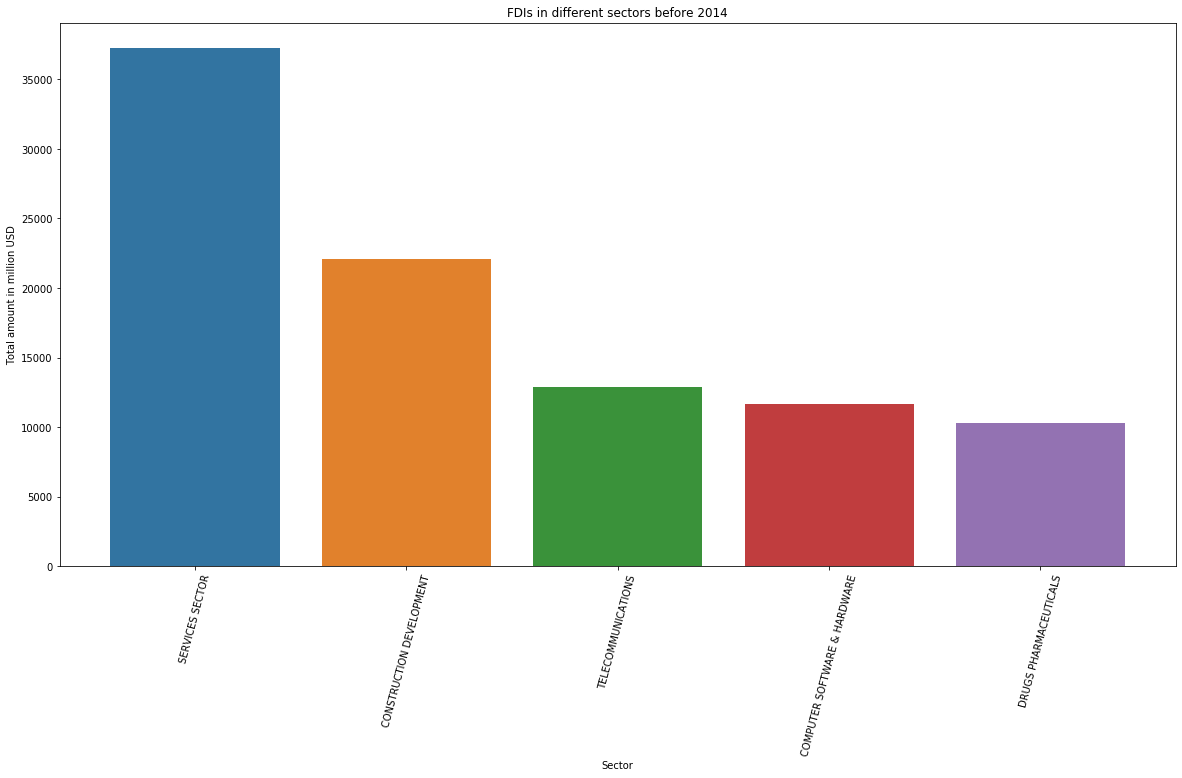

In [0]:
pre = df.loc[:'2013']
post = df.loc['2014':]

top_pre = avg_sector(pre.transpose())
top_post = avg_sector(post.transpose())

pre = pre[top_pre]
pre.loc['Total',:] = pre.sum(axis=0)
# print(pre.loc['Total'])

post = post[top_post]
post.loc['Total',:] = post.sum(axis=0)
# print('\n')
# print(post.loc['Total'])


plt.figure(figsize=(20,10))
sns.barplot(x=pre.columns,y= pre.loc['Total'])
plt.xticks(np.arange(0,5,1),labels=['SERVICES SECTOR','CONSTRUCTION DEVELOPMENT','TELECOMMUNICATIONS','COMPUTER SOFTWARE & HARDWARE','DRUGS PHARMACEUTICALS'], rotation=75)
plt.title('FDIs in different sectors before 2014')
plt.ylabel('Total amount in million USD')
plt.plot()


[]

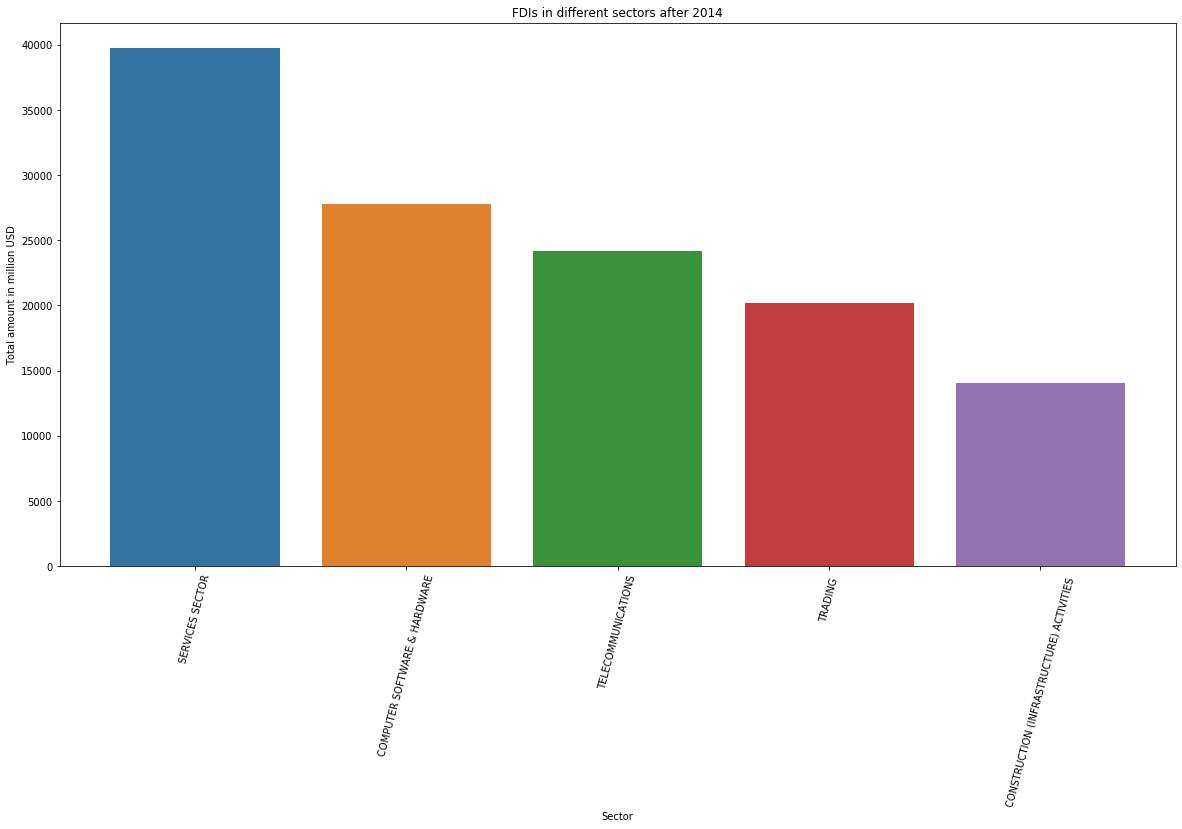

In [0]:

plt.figure(figsize=(20,10))
sns.barplot(x=post.columns,y= post.loc['Total'])
plt.xticks(np.arange(0,5,1),labels=['SERVICES SECTOR','COMPUTER SOFTWARE & HARDWARE','TELECOMMUNICATIONS','TRADING ','CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES '], rotation=75)
plt.title('FDIs in different sectors after 2014')
plt.ylabel('Total amount in million USD')
plt.plot()


### Computer Software & Hardware and Construction infrastructure activity sectors has gone up in FDIs replacing Construction development and Drugs and Pharamceuticals sector since BJP has taken over.

# Simple Linear Regression on the sectors

In [0]:
new = df[['SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)']]
new.rename(columns={'SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)':'Services'}, inplace=True)
new.head()


c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Sector,Services
2001-01-01,71.38
2002-01-01,187.95
2003-01-01,296.34
2004-01-01,271.15
2005-01-01,456.15


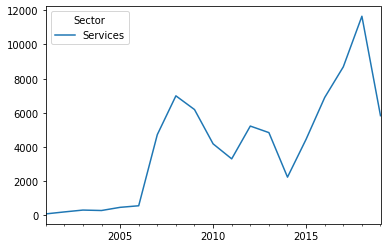

Test statistic:-0.22235921546115114
p value:0.9358034483444051


In [0]:
new.plot()
plt.show()

result = adfuller(new['Services'])

print('Test statistic:'+str(result[0]))
print('p value:'+str(result[1]))



<Figure size 1440x720 with 0 Axes>

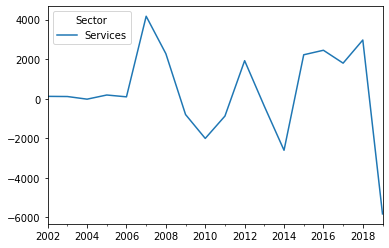

Test statistic:-4.420722032356825
p value:0.00027274595620595786


In [0]:
new_diff = new.diff(1).dropna(inplace=False)
plt.figure(figsize=(20,10))
new_diff.plot()
plt.show()

result = adfuller(new_diff['Services'])

print('Test statistic:'+ str(result[0]))

print('p value:'+str(result[1]))

c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


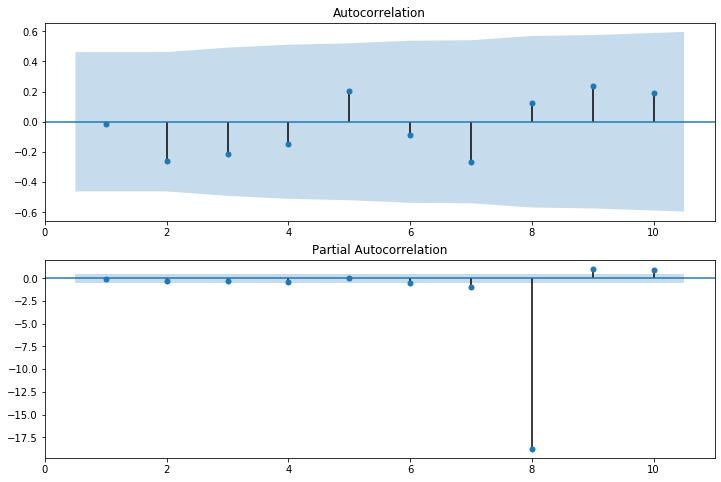

In [0]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

plot_acf(new_diff, lags=10, zero=False, ax=ax1)

plot_pacf(new_diff, lags=10, zero=False, ax=ax2)

plt.show()

In [0]:
for p in range(4):
    for q in range(3):
      try:
        model = SARIMAX(new, order=(p,1,q), trend='c')
        results = model.fit()
        
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


0 0 333.4474250295873 335.2281685453796
0 1 333.52133525096326 336.19245052465175


c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 2 329.53026890023176 333.0917559318164
1 0 335.4670294019618 338.13814467565027


c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


1 1 332.8522666325143 336.4137536640989


c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


1 2 331.4325527086211 335.8844114981019
2 0 335.1971053459906 338.75859237757527


c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


2 1 332.28515730986203 336.73701609934284


c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


2 2 333.691590392169 339.033820939546
3 0 336.57569636053546 341.02755515001627
3 1 334.1296497683129 339.4718803156899


c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


3 2 334.7042137173754 340.93681602264854


c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


c:\users\parik\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


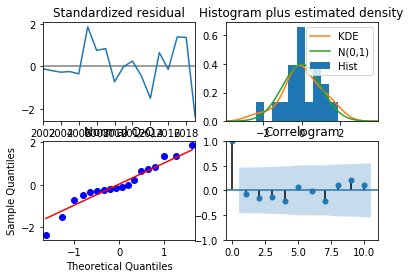

                           Statespace Model Results                           
Dep. Variable:               Services   No. Observations:                   19
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -160.765
Date:                Wed, 08 Jan 2020   AIC                            329.530
Time:                        18:50:22   BIC                            333.092
Sample:                    01-01-2001   HQIC                           330.021
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    396.6681    142.099      2.791      0.005     118.160     675.176
ma.L1          0.0037     18.047      0.000      1.000     -35.368      35.375
ma.L2         -0.9963      0.349     -2.856      0.0

In [0]:
model = SARIMAX(new, order=(0,1,2), trend='c')
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [0]:
one_step_forecast = results.get_prediction(start=-10)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()
# confidence_intervals

lower_limits = confidence_intervals.loc[:,'lower Services']
upper_limits = confidence_intervals.loc[:,'upper Services']

print(mean_forecast)
# one_step_forecast
# new.tail()

2010-01-01    5487.041672
2011-01-01    3337.650149
2012-01-01    4786.459505
2013-01-01    5648.053936
2014-01-01    4861.459670
2015-01-01    3331.156173
2016-01-01    7146.660415
2017-01-01    6301.490893
2018-01-01    9309.534151
2019-01-01    9907.225234
Freq: AS-JAN, dtype: float64


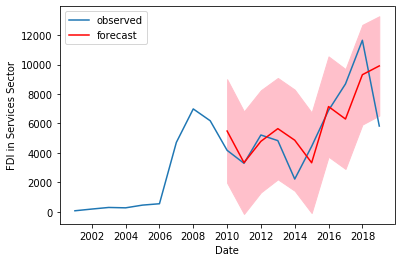

In [0]:
plt.plot(new.index, new, label='observed')

plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index,lower_limits, upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('FDI in Services Sector')
plt.legend()
plt.show()

In [0]:
dynamic_forecast = results.get_forecast(steps=5)

mean_forecast = dynamic_forecast.predicted_mean

confidence_intervals= dynamic_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower Services']
upper_limits = confidence_intervals.loc[:,'upper Services']


print(mean_forecast)

2020-01-01    4115.930313
2021-01-01    8214.944160
2022-01-01    8611.612265
2023-01-01    9008.280369
2024-01-01    9404.948474
Freq: AS-JAN, dtype: float64


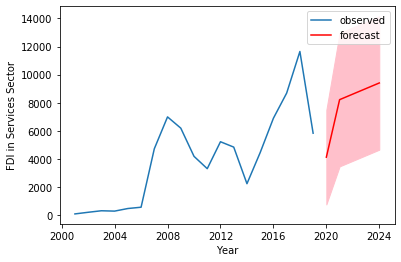

In [0]:
plt.plot(new.index, new, label='observed')

plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

plt.xlabel('Year')
plt.ylabel('FDI in Services Sector')
plt.legend()
plt.show()


In [0]:
forcast= results.forecast(1)
forcast


2020-01-01    4115.930313
Freq: AS-JAN, dtype: float64